### Notebook to plot neighborhood sentiment against actual sentiment

In [2]:
import pandas as pd
import numpy as np
import os
from plotnine import *
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt

In [3]:
##open all crime csvs to concat
crime_2024 = pd.read_csv("../../data/open_data_dc/crime_2024.csv")
crime_2023 = pd.read_csv("../../data/open_data_dc/crime_2023.csv")
crime_2022 = pd.read_csv("../../data/open_data_dc/crime_2022.csv")
crime_2021 = pd.read_csv("../../data/open_data_dc/crime_2021.csv")
crime_2020 = pd.read_csv("../../data/open_data_dc/crime_2020.csv")
crime_2019 = pd.read_csv("../../data/open_data_dc/crime_2019.csv")

In [4]:
dataframes = [crime_2024, crime_2023, crime_2022, crime_2021, crime_2020, crime_2019]

In [5]:
combined_crime = pd.concat(dataframes, ignore_index = True)
combined_crime.head()

,Unnamed: 0,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
0,0,THEFT/OTHER,Cluster 3,Shaw,1,2024,5490
1,1,THEFT/OTHER,Cluster 2,Columbia Heights,1,2024,5490
2,2,THEFT/OTHER,Cluster 26,Capitol Hill,1,2024,5490
3,3,THEFT/OTHER,Cluster 6,Dupont Circle,1,2024,5490
4,4,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637


In [6]:
combined_crime.shape

(74359, 7)

In [7]:
combined_crime = combined_crime.drop(columns=['Unnamed: 0'])
combined_crime.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
0,THEFT/OTHER,Cluster 3,Shaw,1,2024,5490
1,THEFT/OTHER,Cluster 2,Columbia Heights,1,2024,5490
2,THEFT/OTHER,Cluster 26,Capitol Hill,1,2024,5490
3,THEFT/OTHER,Cluster 6,Dupont Circle,1,2024,5490
4,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637


In [8]:
sentiments = pd.read_csv("../../data/average_sentiments_by_year_2019.csv")
sentiments.head()

,Unnamed: 0,neighborhood,year,average_sentiment,date
0,4,adams morgan,2019,5.666667,2019-04-01 12:00:00.000000000
1,5,adams morgan,2021,5.775000,2021-07-08 04:48:00.000000000
2,6,adams morgan,2022,3.750000,2022-03-17 12:00:00.000000000
3,7,adams morgan,2023,4.893519,2023-07-21 16:00:00.000000000
4,8,adams morgan,2024,4.875923,2024-06-14 18:40:00.000000000


In [9]:
sentiments = sentiments.drop(columns=['Unnamed: 0'])
sentiments.head()

,neighborhood,year,average_sentiment,date
0,adams morgan,2019,5.666667,2019-04-01 12:00:00.000000000
1,adams morgan,2021,5.775000,2021-07-08 04:48:00.000000000
2,adams morgan,2022,3.750000,2022-03-17 12:00:00.000000000
3,adams morgan,2023,4.893519,2023-07-21 16:00:00.000000000
4,adams morgan,2024,4.875923,2024-06-14 18:40:00.000000000


In [10]:
crime_shaw = combined_crime[combined_crime["NBH_NAMES"] == "Shaw"]
crime_shaw.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
0,THEFT/OTHER,Cluster 3,Shaw,1,2024,5490
8,THEFT/OTHER,Cluster 7,Shaw,1,2024,5490
12,THEFT F/AUTO,Cluster 3,Shaw,1,2024,2612
16,ASSAULT W/DANGEROUS WEAPON,Cluster 7,Shaw,1,2024,247
17,THEFT F/AUTO,Cluster 3,Shaw,1,2024,2612


In [11]:
sentiments_shaw = sentiments[sentiments["neighborhood"] == "shaw"]
sentiments_shaw.head()

,neighborhood,year,average_sentiment,date
62,shaw,2019,5.833333,2019-06-17 00:00:00.000000000
63,shaw,2020,8.000000,2020-09-01 00:00:00.000000000
64,shaw,2021,6.145833,2021-07-01 12:00:00.000000000
65,shaw,2022,3.807692,2022-08-16 12:00:00.000000000
66,shaw,2023,4.674663,2023-07-10 10:17:08.571428608


In [12]:
merged_df = crime_shaw.merge(sentiments_shaw,left_on="YEAR",right_on="year", how='inner')
merged_df.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount,neighborhood,year,average_sentiment,date
0,THEFT/OTHER,Cluster 3,Shaw,1,2024,5490,shaw,2024,5.664683,2024-06-24 18:40:00.000000000
1,THEFT/OTHER,Cluster 7,Shaw,1,2024,5490,shaw,2024,5.664683,2024-06-24 18:40:00.000000000
2,THEFT F/AUTO,Cluster 3,Shaw,1,2024,2612,shaw,2024,5.664683,2024-06-24 18:40:00.000000000
3,ASSAULT W/DANGEROUS WEAPON,Cluster 7,Shaw,1,2024,247,shaw,2024,5.664683,2024-06-24 18:40:00.000000000
4,THEFT F/AUTO,Cluster 3,Shaw,1,2024,2612,shaw,2024,5.664683,2024-06-24 18:40:00.000000000


In [13]:
merged_df['year'] = merged_df['year'].astype(str)

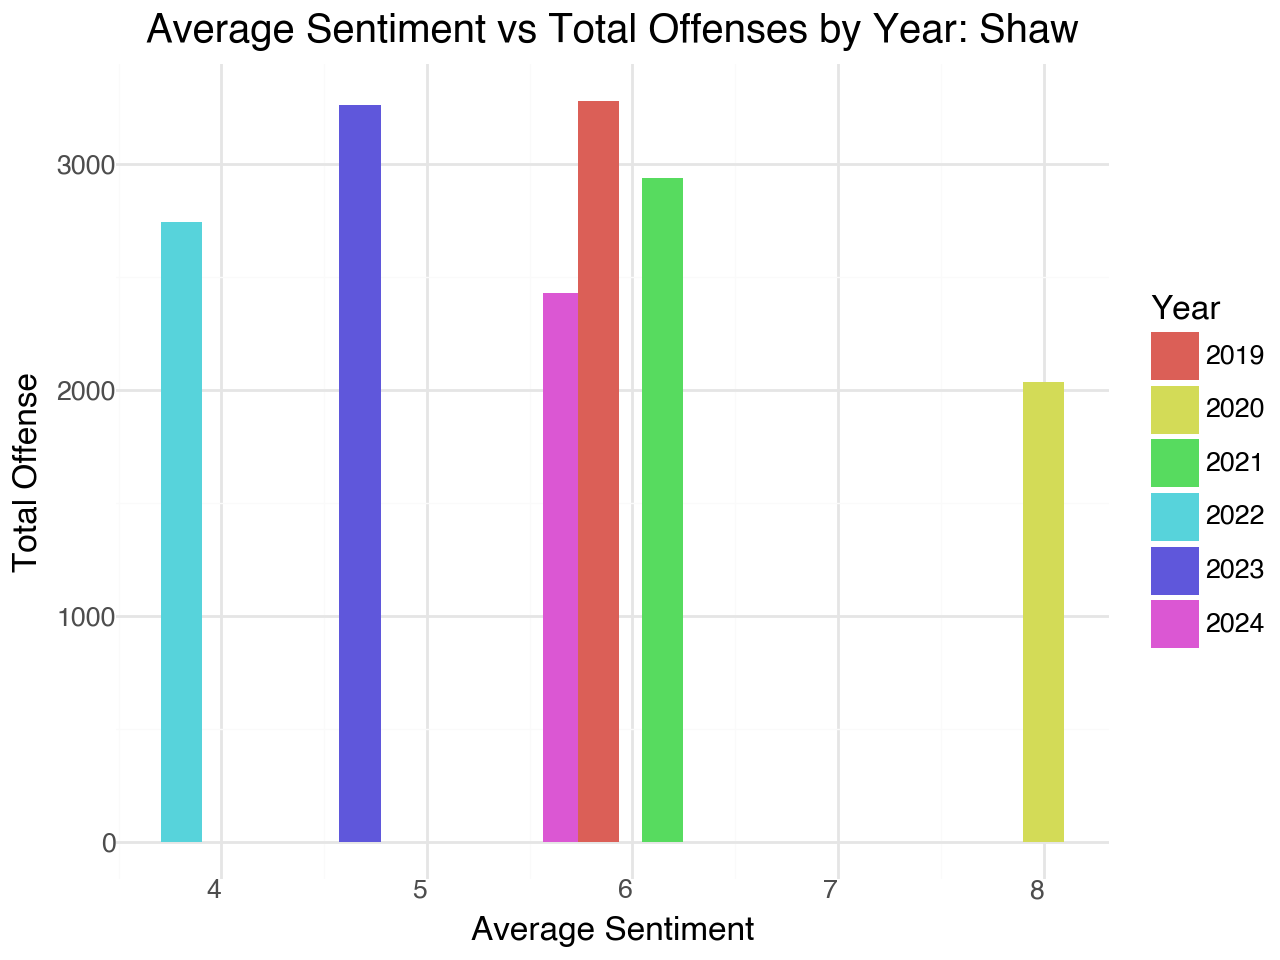

In [62]:
shaw_sentiment_plot = (ggplot(data=merged_df) +
    # Bar for Average Sentiment
    geom_bar(aes(x="average_sentiment", fill = "year"), 
             stat="count",  width=0.20) +
    
    # Theme and adjustments
    theme_minimal(base_size=12) + 
    theme(axis_text_x=element_text(hjust=1)) +
    
    # Title and labels
    labs(x="Average Sentiment", y="Total Offense", title="Average Sentiment vs Total Offenses by Year: Shaw", fill="Year")
)

shaw_sentiment_plot

In [64]:
ggsave(shaw_sentiment_plot, "../../figures/shaw_crime.png")

In [16]:
crime_columbia_heights = combined_crime[combined_crime["NBH_NAMES"] == "Columbia Heights"]
crime_columbia_heights.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
1,THEFT/OTHER,Cluster 2,Columbia Heights,1,2024,5490
7,ROBBERY,Cluster 2,Columbia Heights,1,2024,875
21,THEFT F/AUTO,Cluster 2,Columbia Heights,1,2024,2612
26,MOTOR VEHICLE THEFT,Cluster 2,Columbia Heights,1,2024,1637
30,ROBBERY,Cluster 2,Columbia Heights,1,2024,875


In [17]:
sentiments_columbia_heights = sentiments[sentiments["neighborhood"] == "columbia heights"]
sentiments_columbia_heights.head()

,neighborhood,year,average_sentiment,date
14,columbia heights,2019,4.357143,2019-07-17 06:00:00.000000000
15,columbia heights,2020,4.000000,2020-11-01 00:00:00.000000000
16,columbia heights,2021,4.562925,2021-08-31 13:42:51.428571392
17,columbia heights,2022,3.373333,2022-05-08 09:36:00.000000000
18,columbia heights,2023,4.224053,2023-08-04 18:00:00.000000000


In [18]:
merged_df_2 = crime_columbia_heights.merge(sentiments_columbia_heights,left_on="YEAR",right_on="year", how='inner')
merged_df_2.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount,neighborhood,year,average_sentiment,date
0,THEFT/OTHER,Cluster 2,Columbia Heights,1,2024,5490,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000
1,ROBBERY,Cluster 2,Columbia Heights,1,2024,875,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000
2,THEFT F/AUTO,Cluster 2,Columbia Heights,1,2024,2612,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000
3,MOTOR VEHICLE THEFT,Cluster 2,Columbia Heights,1,2024,1637,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000
4,ROBBERY,Cluster 2,Columbia Heights,1,2024,875,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000


In [19]:
merged_df_2['year'] = merged_df_2['year'].astype(str)

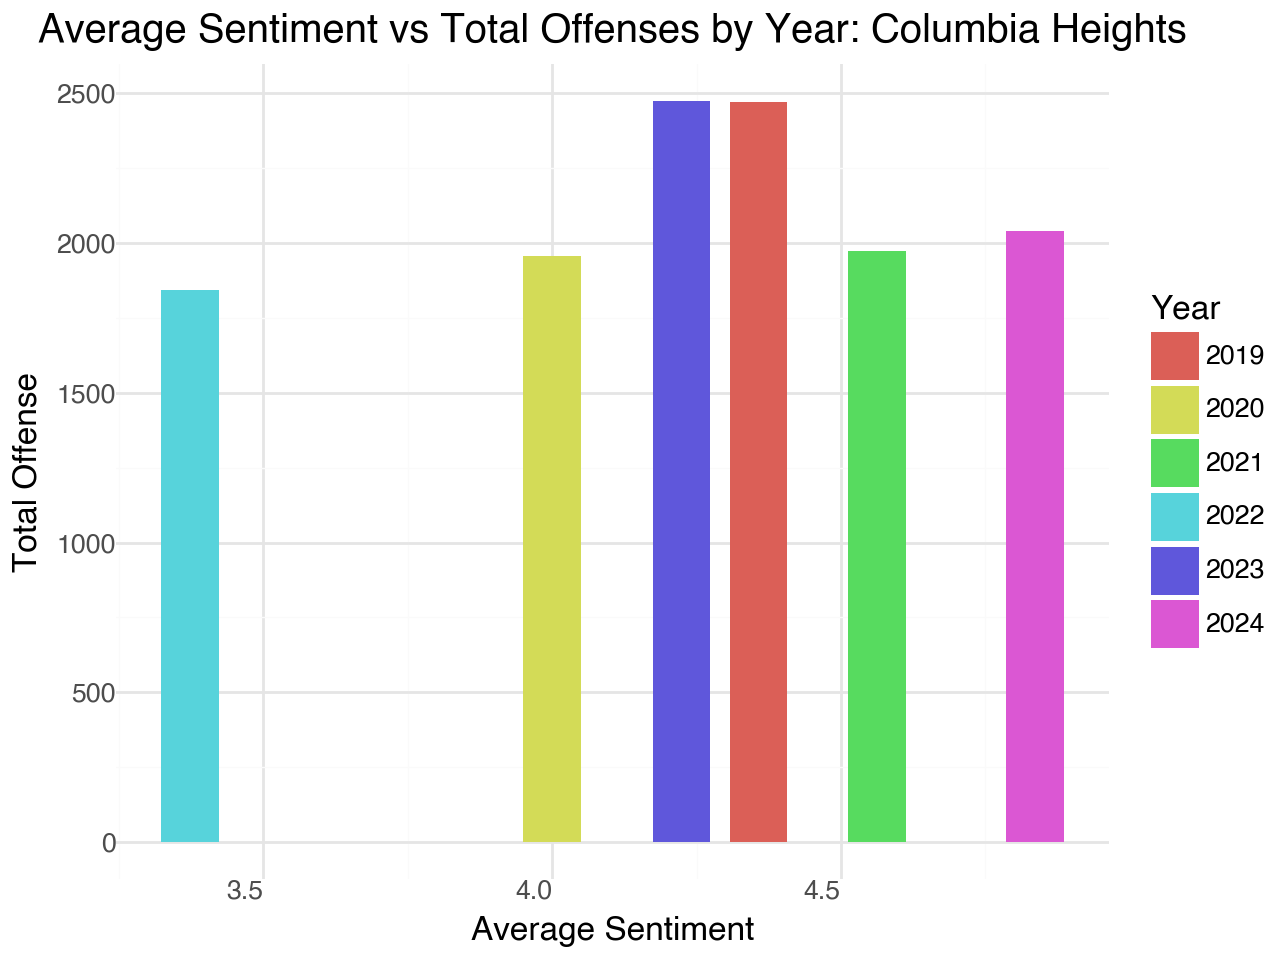

In [58]:
columbia_heights_sentiment_plot = (ggplot(data=merged_df_2) +
    # Bar for Average Sentiment
    geom_bar(aes(x="average_sentiment", fill = "year"), 
             stat="count", width=0.10) +
    
    # Theme and adjustments
    theme_minimal(base_size=12) + 
    theme(axis_text_x=element_text(hjust=1)) +
    
    # Title and labels
    labs(x="Average Sentiment", y="Total Offense", title="Average Sentiment vs Total Offenses by Year: Columbia Heights", fill="Year")
)

columbia_heights_sentiment_plot

In [60]:
ggsave(columbia_heights_sentiment_plot, "../../figures/columbia_heights_crime.png")

In [22]:
crime_anacostia = combined_crime[combined_crime["NBH_NAMES"] == "Historic Anacostia"]
crime_anacostia.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount
4,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637
83,THEFT F/AUTO,Cluster 28,Historic Anacostia,1,2024,2612
134,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637
135,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637
140,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637


In [23]:
sentiments_anacostia = sentiments[sentiments["neighborhood"] == "anacostia"]
sentiments_anacostia.head()

,neighborhood,year,average_sentiment,date
5,anacostia,2021,4.500000,2021-03-16 12:00:00.000000000
6,anacostia,2023,3.888504,2023-06-16 04:00:00.000000000
7,anacostia,2024,4.352189,2024-05-11 18:40:00.000000000


In [24]:
merged_df_3 = crime_anacostia.merge(sentiments_anacostia,left_on="YEAR",right_on="year", how='inner')
merged_df_3.head()

,OFFENSE,NEIGHBORHOOD_CLUSTER,NBH_NAMES,COUNT,YEAR,TotalOffenseCount,neighborhood,year,average_sentiment,date
0,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637,anacostia,2024,4.352189,2024-05-11 18:40:00.000000000
1,THEFT F/AUTO,Cluster 28,Historic Anacostia,1,2024,2612,anacostia,2024,4.352189,2024-05-11 18:40:00.000000000
2,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637,anacostia,2024,4.352189,2024-05-11 18:40:00.000000000
3,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637,anacostia,2024,4.352189,2024-05-11 18:40:00.000000000
4,MOTOR VEHICLE THEFT,Cluster 28,Historic Anacostia,1,2024,1637,anacostia,2024,4.352189,2024-05-11 18:40:00.000000000


In [25]:
merged_df_3['year'] = merged_df_3['year'].astype(str)

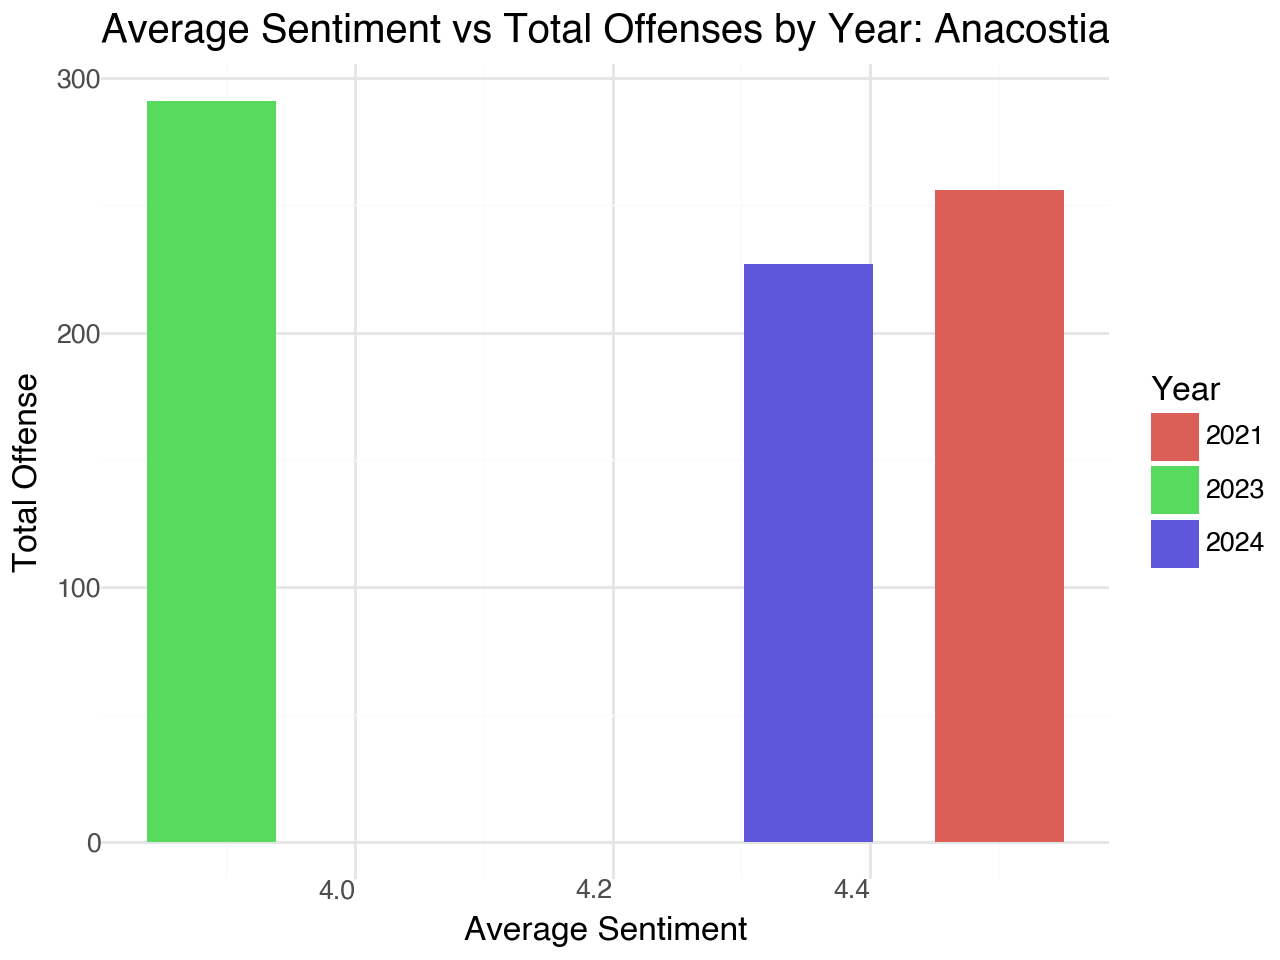

In [54]:
anacostia_sentiment_plot = (ggplot(data=merged_df_3) +
    # Bar for Average Sentiment
    geom_bar(aes(x="average_sentiment", fill = "year"), 
             stat="count", width=0.1) +
    
    # Theme and adjustments
    theme_minimal(base_size=12) + 
    theme(axis_text_x=element_text(hjust=1)) +
    
    # Title and labels
    labs(x="Average Sentiment", y="Total Offense", title="Average Sentiment vs Total Offenses by Year: Anacostia", fill="Year")
)

anacostia_sentiment_plot

In [56]:
ggsave(anacostia_sentiment_plot, "../../figures/anacostia_crime.png")